# Importação das bibliotecas

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

# Carregamento dos dataset de resultados

In [40]:
#usuario= "igorcapeletti"
usuario= "igorubuntu"

raiz= f"/home/{usuario}/github/tcc_eBPF_XDP/graficos"

#pasta de resultados gerais para programas eBPF: ----------------
#pasta_resultado_ebpf= 'resultados1'
#pasta_resultado_ebpf= 'resultados2'
pasta_resultado_ebpf= 'resultados3'
#pasta_resultado_ebpf= 'resultados4'
raiz_ebpf= f"/home/{usuario}/github/tcc_eBPF_XDP/experimentos/{pasta_resultado_ebpf}"


#pasta de resultados gerais para programas AF_XDP: ----------------
#pasta_resultado_af_xdp= 'resultados_af_xdp1'
#pasta_resultado_af_xdp= 'resultados_af_xdp2'
pasta_resultado_af_xdp= 'resultados_af_xdp3'
raiz_af_xdp= f"/home/{usuario}/github/tcc_eBPF_XDP/experimentos/{pasta_resultado_af_xdp}"


#carregamento dos arquivos CSV dos resultados dos programas eBPF e AF_XDP: ----------------
df_gerador_ebpf = pd.read_csv(f'{raiz_ebpf}/resultado_geral_gerador.csv', sep=',', engine='python')
df_gerador_af_xdp = pd.read_csv(f'{raiz_af_xdp}/resultado_geral_gerador.csv', sep=',', engine='python')

#normalizacao dos dados af_xdp
df_gerador_af_xdp['hook_ebpf']= df_gerador_af_xdp['hook_ebpf'].replace('xdpgeneric','af_xdp')

#concatenação dos dataframes referentes a cada analise (ebpf+af_xdp)
df_gerador= pd.concat([df_gerador_ebpf,df_gerador_af_xdp], sort = False)


In [41]:
lista_combined= [1,2,4,8]

lista_for= ['for_0_a_0','for_0_a_1','for_0_a_100','for_0_a_200','for_0_a_400','for_0_a_800','for_0_a_1600','for_0_a_3200','for_0_a_6400','for_0_a_12800']
lista_alias_for= ['0','1','100','200','400','800','1600','3200','6400','12800']

lista_hook_xdp= ['xdpgeneric','xdpdvr','af_xdp']

lista_pacotes= [64,128,256,512,1024,1500]
lista_alias_pacotes= ['64B','128B','256B','512B','1024B','1500B']

lista_tipo_programa= ['ebpf','af_xdp']

# Normalização dos datasets

In [46]:
#antes de executar isso, eliminar ultima coluna dos arquivos perf que estão em branco

colunas= ['combined', 'algoritmo', 'packet_size', 'hook_ebpf', 'latencymean']
df_gerador= df_gerador[colunas]

df_gerador['hook_ebpf']= df_gerador['hook_ebpf'].replace('af_xdp','AF_XDP')
df_gerador['hook_ebpf']= df_gerador['hook_ebpf'].replace('xdpgeneric','Generic')
df_gerador['hook_ebpf']= df_gerador['hook_ebpf'].replace('xdpdrv','Native')

for i,j in zip(lista_for,lista_alias_for):
       df_gerador['algoritmo']= df_gerador['algoritmo'].replace(f'{i}',f'{j}')

df_gerador['algoritmo']= df_gerador['algoritmo'].astype(int)

df_gerador= df_gerador[df_gerador['latencymean'] >= 0]

df_gerador

,combined,algoritmo,packet_size,hook_ebpf,latencymean
0,4,0,64,Native,0.00
1,2,0,64,Native,0.00
16,8,0,64,Native,0.00
27,1,0,64,Native,0.00
49,4,3200,64,Native,0.04
...,...,...,...,...,...
426,2,200,1500,Generic,0.00
451,8,1600,1500,Generic,0.00
471,4,1600,1500,Generic,0.02
475,1,1600,1500,Generic,0.02


# Resultados do gerador

In [74]:
format_imagens= '.pdf'
df

,algoritmo,latencymean,Pacotes,hook_ebpf
0,0,0.00,256B,Generic
1,0,0.00,1024B,Generic
2,0,0.00,1500B,Generic
3,1,0.01,256B,Generic
4,1,0.00,1024B,Generic
...,...,...,...,...
125,6400,0.00,1500B,AF_XDP
126,12800,0.15,128B,AF_XDP
127,12800,0.15,256B,AF_XDP
128,12800,0.15,1024B,AF_XDP


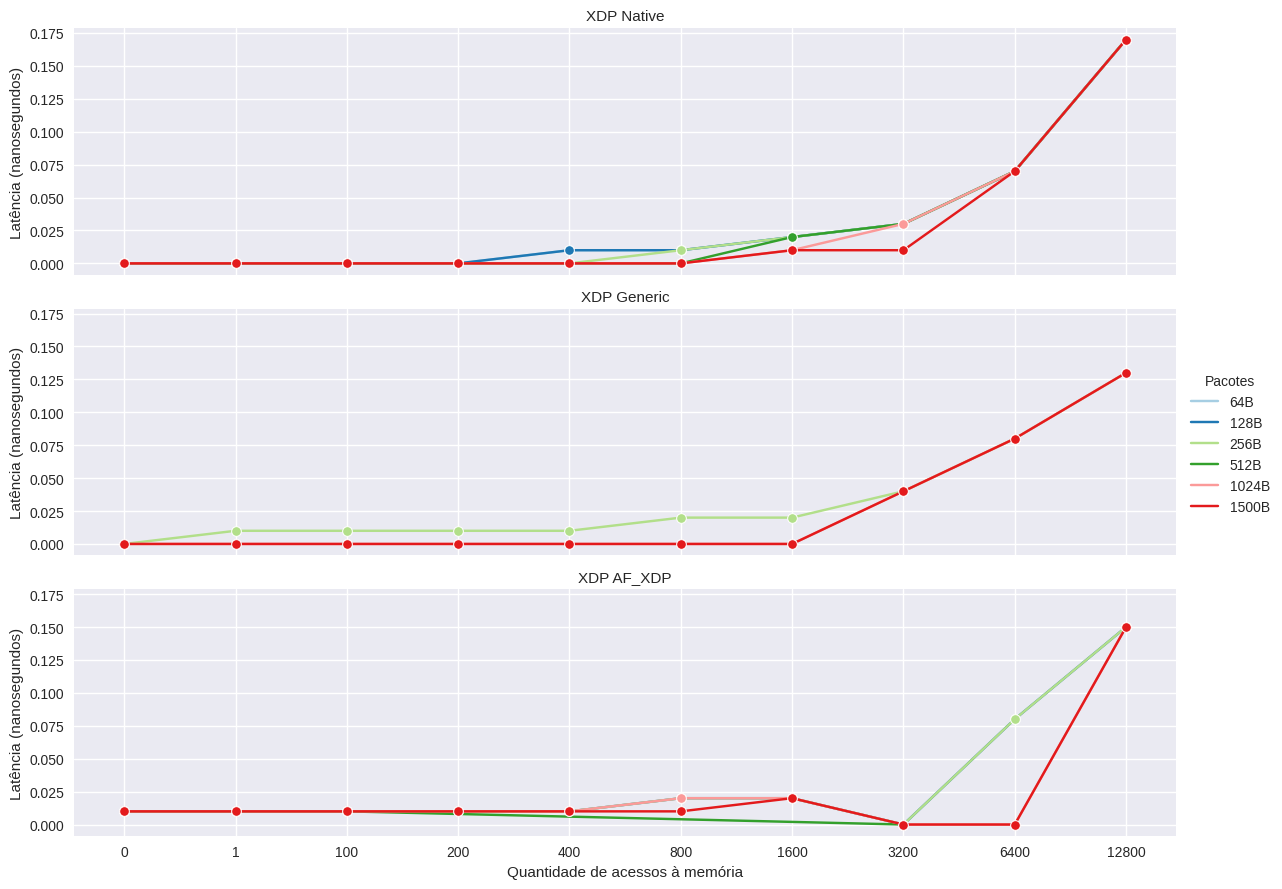

In [80]:

eixo_x= 'algoritmo'
eixo_y= 'latencymean'
hue= 'packet_size'

plt.rc('figure', figsize=(20, 5))

df= df_gerador.copy()
df1= pd.concat([df[df.hook_ebpf == 'Generic'], df[df.hook_ebpf == 'Native']], sort = False)
df1= df1[df1.combined == 8]

df2= df[df.combined == 1]
df2= df2[df2.hook_ebpf == 'AF_XDP']

df= pd.concat([df1, df2], sort = False)
df= df.sort_values(by=[eixo_x,hue], ascending=True)
df = df.rename(columns={'packet_size': 'Pacotes'})

df['Pacotes']= df['Pacotes'].astype(str)
df['algoritmo']= df['algoritmo'].astype(str)
for i,j in zip(lista_pacotes,lista_alias_pacotes):
       df['Pacotes']= df['Pacotes'].replace(f'{i}',f'{j}')


df= df[[eixo_x, eixo_y, 'Pacotes', 'hook_ebpf']]


df.index= range(len(df))

grafico = sns.relplot(
    data=df, x=eixo_x, y=eixo_y,
    col='hook_ebpf', hue='Pacotes',
    kind="line", palette='Paired', col_wrap=1, marker='o',
    height= 3, aspect=12/3
)

grafico.set_ylabels("Latência (nanosegundos)")
grafico.set_xlabels("Quantidade de acessos à memória")
grafico.set_titles("XDP {col_name}")


grafico.savefig(f'{raiz}/latencia_{hue}_x_{eixo_x}@combined_melhores_por_modo_xdp{format_imagens}')